# Smartphone Data Objective: 
## In this Machine Learning Project, we will create a model for recognition of human activity using the smartphone data.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Load training and test Data

In [8]:
#Import Datasets 
train_smart = pd.read_csv('https://thecleverprogrammer.com/wp-content/uploads/2020/05/train-1.csv')
#("⁨/Users⁩/⁨mehrunisaqayyum⁩/Downloads/train.csv")
test_smart = pd.read_csv('https://thecleverprogrammer.com/wp-content/uploads/2020/05/test.csv')
#("/⁨Users⁩/⁨mehrunisaqayyum⁩/⁨Downloads/test.csv")

In [9]:
train_smart.tail(10)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
7342,0.276137,-0.108046,-0.056677,-0.230796,-0.140521,0.117919,-0.300133,-0.102807,0.181639,0.236195,...,-0.534599,-0.097489,0.172312,0.918171,-0.609025,-0.830575,0.213174,-0.005105,30,WALKING_UPSTAIRS
7343,0.294230,-0.039968,-0.143397,-0.230396,-0.133669,0.095870,-0.308265,-0.112551,0.162174,0.185661,...,-0.603412,-0.201502,-0.416537,0.885558,-0.879032,-0.799426,0.235490,-0.001647,30,WALKING_UPSTAIRS
7344,0.221206,-0.036390,-0.167651,-0.176954,-0.050147,0.075128,-0.269247,-0.027326,0.110784,0.185661,...,-0.338078,0.256085,-0.544541,-0.546757,-0.950493,-0.787935,0.244490,0.009538,30,WALKING_UPSTAIRS
7345,0.207861,0.063423,-0.220567,-0.244758,-0.032159,0.118361,-0.339273,-0.088895,0.146128,0.118226,...,-0.930159,0.263885,-0.290563,-0.864127,0.591409,-0.780362,0.249624,0.027878,30,WALKING_UPSTAIRS
7346,0.237966,-0.001088,-0.148326,-0.218949,-0.012927,0.170019,-0.309599,-0.041392,0.207454,0.210795,...,-0.867236,0.352776,-0.604817,-0.774783,0.730142,-0.797272,0.234996,0.048907,30,WALKING_UPSTAIRS
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,WALKING_UPSTAIRS
7351,0.351503,-0.012423,-0.203867,-0.269270,-0.087212,0.177404,-0.377404,-0.038678,0.229430,0.269013,...,-0.740738,-0.280088,-0.007739,-0.056088,-0.616956,-0.783267,0.246809,0.036695,30,WALKING_UPSTAIRS


In [10]:
test_smart.tail(10)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
2937,0.305631,-0.052702,-0.155684,-0.343078,-0.151250,-0.177296,-0.383228,-0.181989,-0.287325,-0.108216,...,-0.714939,-0.338596,0.363565,-0.951163,-0.228412,-0.691122,0.241953,0.180141,24,WALKING_UPSTAIRS
2938,0.321443,-0.023799,-0.119695,-0.336548,-0.183307,-0.154297,-0.396342,-0.224409,-0.220786,-0.073510,...,-0.563389,-0.874477,-0.684506,-0.948809,0.472612,-0.677946,0.256877,0.177768,24,WALKING_UPSTAIRS
2939,0.267413,-0.021596,-0.070550,-0.323426,-0.118042,-0.323907,-0.395468,-0.129623,-0.335741,0.053516,...,-0.761280,0.218079,-0.690839,-0.922779,0.232523,-0.672635,0.261034,0.178609,24,WALKING_UPSTAIRS
2940,0.147146,-0.046908,-0.069338,-0.348686,0.018057,-0.364716,-0.437199,0.019297,-0.411240,0.053516,...,-0.850109,0.524082,0.041970,-0.922941,0.489178,-0.660366,0.272243,0.178547,24,WALKING_UPSTAIRS
2941,0.192275,-0.033643,-0.105949,-0.354841,-0.092504,-0.312910,-0.433579,-0.088741,-0.336060,-0.041624,...,-0.916493,0.535983,0.689306,-0.936606,0.562375,-0.646754,0.282150,0.181152,24,WALKING_UPSTAIRS
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,24,WALKING_UPSTAIRS
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,24,WALKING_UPSTAIRS
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,24,WALKING_UPSTAIRS
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,24,WALKING_UPSTAIRS
2946,0.153627,-0.018437,-0.137018,-0.330046,-0.195253,-0.164339,-0.430974,-0.218295,-0.229933,-0.111527,...,-0.436940,0.598808,-0.287951,0.876030,-0.024965,-0.660080,0.263936,0.188103,24,WALKING_UPSTAIRS


### Combine Datasets

In [26]:
train_smart['Data'] = 'Train'
test_smart['Data'] = 'Test'

In [27]:
smartphone_df = pd.concat([train_smart, test_smart], axis=0).reset_index(drop=True)
smartphone_df['subject'] = '#' + smartphone_df['subject'].astype(str)

In [12]:
smartphone_df.tail(10)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
10289,0.305631,-0.052702,-0.155684,-0.343078,-0.151250,-0.177296,-0.383228,-0.181989,-0.287325,-0.108216,...,-0.714939,-0.338596,0.363565,-0.951163,-0.228412,-0.691122,0.241953,0.180141,#24,WALKING_UPSTAIRS
10290,0.321443,-0.023799,-0.119695,-0.336548,-0.183307,-0.154297,-0.396342,-0.224409,-0.220786,-0.073510,...,-0.563389,-0.874477,-0.684506,-0.948809,0.472612,-0.677946,0.256877,0.177768,#24,WALKING_UPSTAIRS
10291,0.267413,-0.021596,-0.070550,-0.323426,-0.118042,-0.323907,-0.395468,-0.129623,-0.335741,0.053516,...,-0.761280,0.218079,-0.690839,-0.922779,0.232523,-0.672635,0.261034,0.178609,#24,WALKING_UPSTAIRS
10292,0.147146,-0.046908,-0.069338,-0.348686,0.018057,-0.364716,-0.437199,0.019297,-0.411240,0.053516,...,-0.850109,0.524082,0.041970,-0.922941,0.489178,-0.660366,0.272243,0.178547,#24,WALKING_UPSTAIRS
10293,0.192275,-0.033643,-0.105949,-0.354841,-0.092504,-0.312910,-0.433579,-0.088741,-0.336060,-0.041624,...,-0.916493,0.535983,0.689306,-0.936606,0.562375,-0.646754,0.282150,0.181152,#24,WALKING_UPSTAIRS
10294,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,#24,WALKING_UPSTAIRS
10295,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,#24,WALKING_UPSTAIRS
10296,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,#24,WALKING_UPSTAIRS
10297,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,#24,WALKING_UPSTAIRS
10298,0.153627,-0.018437,-0.137018,-0.330046,-0.195253,-0.164339,-0.430974,-0.218295,-0.229933,-0.111527,...,-0.436940,0.598808,-0.287951,0.876030,-0.024965,-0.660080,0.263936,0.188103,#24,WALKING_UPSTAIRS


In [13]:
train_smart.shape, test_smart.shape

((7352, 563), (2947, 563))

### Note: Same number of columns

In [14]:
smartphone_df.dtypes.value_counts()

float64    561
object       2
dtype: int64

In [28]:
def basic_details(smartphone_df):
    b = pd.DataFrame()
    b['Missing value'] = smartphone_df.isnull().sum()
    b['N unique value'] = smartphone_df.nunique()  #unique values
    b['dtype'] = smartphone_df.dtypes
    return b
basic_details(smartphone_df)

,Missing value,N unique value,dtype
tBodyAcc-mean()-X,0,10292,float64
tBodyAcc-mean()-Y,0,10299,float64
tBodyAcc-mean()-Z,0,10293,float64
tBodyAcc-std()-X,0,10295,float64
tBodyAcc-std()-Y,0,10297,float64
...,...,...,...
"angle(Y,gravityMean)",0,10299,float64
"angle(Z,gravityMean)",0,10299,float64
subject,0,30,object
Activity,0,6,object


## Feature Analysis

Text(0.5, 1.0, 'Plot 1: Occurrences of Activities')

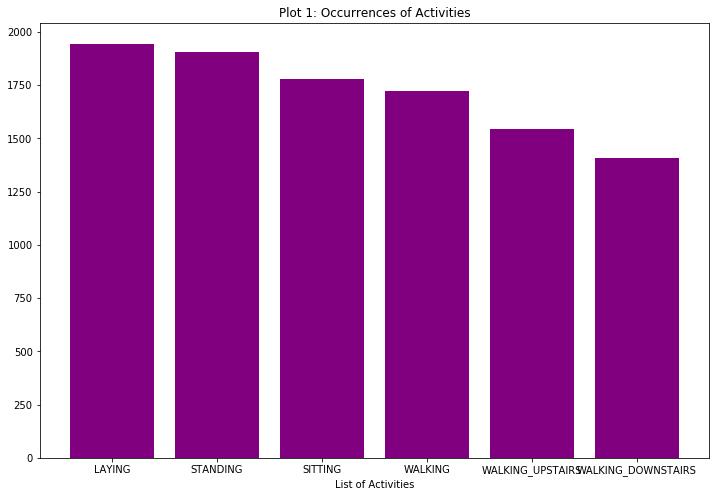

In [29]:
#Identify instances of 'Activity' in rows
activity = smartphone_df['Activity']
label_counts = activity.value_counts()


#Plot Activities
plt.figure(figsize= (12, 8))
plt.bar(label_counts.index, label_counts, color = 'Purple')
plt.xlabel('List of Activities')
plt.title('Plot 1: Occurrences of Activities')

## Scale the Data

In [30]:
Data = smartphone_df['Data']
Subject = smartphone_df['subject']
train_smart = smartphone_df.copy()
train_smart2 = train_smart.drop(['Data','subject','Activity'], axis =1)

In [31]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler
slc = StandardScaler()
train = slc.fit_transform(train_smart2)

## Reduce Features' Dimensions

In [32]:
# dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9, random_state=0)
train = pca.fit_transform(train_smart2)

## Split Data into Train and Test

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_smart2, activity, test_size = 0.2, random_state = 0)

### Note: 
num_folds = 10
seed = 0
scoring = 'accuracy'
results = {}
accuracy = {}

In [37]:
num_folds = 10
seed = 0
scoring = 'accuracy'
results = {}
accuracy = {}

## Activity Recognition Algorithm: K-Neighbors Classifier

In [34]:
# Finalizing the model and comparing the test, predict results
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import KFold, cross_val_score

In [38]:
model = KNeighborsClassifier(algorithm= 'auto', n_neighbors= 8, p= 1, weights= 'distance')

_ = cross_val_score(model, X_train, y_train, cv=10, scoring=scoring) #What does this do?
results["GScv"] = (_.mean(), _.std())

model.fit(X_train, y_train) 
y_predict = model.predict(X_test)

accuracy["GScv"] = accuracy_score(y_test, y_predict)

In [39]:
print(classification_report(y_test, y_predict))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       377
           SITTING       0.98      0.95      0.97       364
          STANDING       0.96      0.98      0.97       390
           WALKING       0.99      1.00      1.00       335
WALKING_DOWNSTAIRS       1.00      0.98      0.99       278
  WALKING_UPSTAIRS       0.99      1.00      1.00       316

          accuracy                           0.99      2060
         macro avg       0.99      0.99      0.99      2060
      weighted avg       0.99      0.99      0.99      2060



### Note: 
Amazing precision (positive predictive value) and recall, or 'sensitivity' (fraction of the total amount of relevant instances that were actually retrieved scores). Both the False "Positives" and False "Negatives" are quite low. 

Specifically: 'Laying' and 'Walking_Downstairs" are measured with 100 percent precision. Meanwhile, 'Laying' and "Walking_Upstairs" are measured with 100 percent 'sensitivity' based on 'Recall'. 

Note: Precision is calculated by the number of [true positives] / [(true positives) + (false positives)]

### Confusion Matrix

In [40]:
cm= confusion_matrix(y_test, y_predict)

### Heatmap

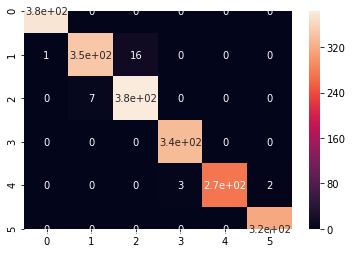

In [41]:
sn.heatmap(cm, annot=True)

## Note: 
More practice here: https://becominghuman.ai/10-machine-learning-projects-to-boost-your-portfolio-88d17e2825b3